In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as la

sr = pd.read_csv("geodata.csv")

In [2]:
def Haversine(lat1,lon1,lat2,lon2, **kwarg):
    """
    This uses the ‘haversine’ formula to calculate the great-circle distance between two points – that is, 
    the shortest distance over the earth’s surface – giving an ‘as-the-crow-flies’ distance between the points 
    (ignoring any hills they fly over, of course!).
    Haversine
    formula:    a = sin²(Δφ/2) + cos φ1 ⋅ cos φ2 ⋅ sin²(Δλ/2)
    c = 2 ⋅ atan2( √a, √(1−a) )
    d = R ⋅ c
    where   φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km);
    note that angles need to be in radians to pass to trig functions!
    """
    R = 6371.0088
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2) **2
    c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    d = R * c
   
    return round(d,1)

In [3]:
sr['distance']=Haversine(sr['src_latitude'],sr['src_longitude'],sr['dst_latitude'],sr['dst_longitude'])

1. Grouping the users based on their activity

In [4]:
sender = list(sr['src_user'])
s_set = set(sr['src_user'])
receiver = list(sr['dst_user'])
r_set = set(sr['dst_user'])

users = sender + receiver

user = {}
for i in users:
    if i not in user.keys():
        user[i] = 0
    user[i] += 1   

In [5]:
user_merc = user.copy()
user_mine = user.copy()

del_key = []
for i in user_merc.keys():
    if user_merc[i] < 120:
        del_key.append(i)
        
for i in del_key:
    user_merc.pop(i)

    
del_key0 = []
for i in user_mine.keys():
    if user_mine[i] > 50:
        del_key0.append(i)
        
for i in del_key0:
    user_mine.pop(i)

In [6]:
merchant = set(user_merc.keys())
miner1 = set(user_mine.keys())

In [7]:
value = list(sr['value'])

maxtx = {}

for i in range(101342):
    address = sender[i]
    if address not in maxtx.keys():
        maxtx[address] = 0
    if value[i] > maxtx[address]:
        maxtx[address] = value[i]

In [8]:
del_key1 = []
for i in maxtx.keys():
    if maxtx[i] < 15:
        del_key1.append(i)
        
for i in del_key1:
    maxtx.pop(i)

In [9]:
miner2 = set(maxtx.keys())
miner = miner1 & miner2
users = (s_set | r_set) - (miner | merchant)

2. Grouping by geolocation

In [10]:
miner_cont = [[], [], []]
merc_cont = [[], [], []]
users_cont = [[], [], []]
cont = ['NAM', 'SA', 'EU', 'AS', 'OC'] 

In [11]:
for i in miner:
    is_IDs = sr['src_user'] == i
    is_IDd = sr['dst_user'] == i

    sr_ID = sr[is_IDs | is_IDd]
    
    row = sr_ID.loc[sr_ID.index[0]]
    if row[0] == i:
        if row[4] == cont[0]:
            miner_cont[0].append(i)
        elif row[4] == cont[1]:
            miner_cont[0].append(i)
        elif row[4] == cont[2]:
            miner_cont[1].append(i)
        elif row[4] == cont[3]:
            miner_cont[2].append(i) 
        elif row[4] == cont[4]:
            miner_cont[2].append(i)
    else:
        if row[13] == cont[0]:
            miner_cont[0].append(i)
        elif row[13] == cont[1]:
            miner_cont[0].append(i)
        elif row[13] == cont[2]:
            miner_cont[1].append(i)
        elif row[13] == cont[3]:
            miner_cont[2].append(i)
        elif row[13] == cont[4]:
            miner_cont[2].append(i)
                
for i in merchant:
    is_IDs = sr['src_user'] == i
    is_IDd = sr['dst_user'] == i

    sr_ID = sr[is_IDs | is_IDd]
    
    row = sr_ID.loc[sr_ID.index[0]]
    if row[0] == i:
        if row[4] == cont[0]:
            merc_cont[0].append(i)
        elif row[4] == cont[1]:
            merc_cont[0].append(i)
        elif row[4] == cont[2]:
            merc_cont[1].append(i)
        elif row[4] == cont[3]:
            merc_cont[2].append(i) 
        elif row[4] == cont[4]:
            merc_cont[2].append(i)
    else:
        if row[13] == cont[0]:
            merc_cont[0].append(i)
        elif row[13] == cont[1]:
            merc_cont[0].append(i)
        elif row[13] == cont[2]:
            merc_cont[1].append(i)
        elif row[13] == cont[3]:
            merc_cont[2].append(i)
        elif row[13] == cont[4]:
            merc_cont[2].append(i) 
            
for i in users:
    is_IDs = sr['src_user'] == i
    is_IDd = sr['dst_user'] == i

    sr_ID = sr[is_IDs | is_IDd]
    
    row = sr_ID.loc[sr_ID.index[0]]
    if row[0] == i:
        if row[4] == cont[0]:
            users_cont[0].append(i)
        elif row[4] == cont[1]:
            users_cont[0].append(i)
        elif row[4] == cont[2]:
            users_cont[1].append(i)
        elif row[4] == cont[3]:
            users_cont[2].append(i) 
        elif row[4] == cont[4]:
            users_cont[2].append(i)
    else:
        if row[13] == cont[0]:
            users_cont[0].append(i)
        elif row[13] == cont[1]:
            users_cont[0].append(i)
        elif row[13] == cont[2]:
            users_cont[1].append(i)
        elif row[13] == cont[3]:
            users_cont[2].append(i)
        elif row[13] == cont[4]:
            users_cont[2].append(i)                 

3. Making the relative freqency matrix

In [12]:
rel_freq = []
for i in range(9):
    rel_freq.append([0,0,0,0,0,0,0,0,0])

In [13]:
def find_pos(id, cont):
    if id in miner:
        if cont == 'NAM':
            return 0
        elif cont  == 'SA':
            return 0
        elif cont == 'EU':
            return 1
        elif cont == 'AS':
            return 2
        elif cont == 'OC':
            return 2
    elif id in merchant:
        if cont == 'NAM':
            return 3
        elif cont  == 'SA':
            return 3
        elif cont == 'EU':
            return 4
        elif cont == 'AS':
            return 5
        elif cont == 'OC':
            return 5
    elif id in users:
        if cont == 'NAM':
            return 6
        elif cont  == 'SA':
            return 6
        elif cont == 'EU':
            return 7
        elif cont == 'AS':
            return 8
        elif cont == 'OC':
            return 8       

In [14]:
for row in sr.values:
    sen = row[0]
    rec = row[9]
    s_cont = row[4]
    r_cont = row[13]
    rel_freq[find_pos(sen, s_cont)][find_pos(rec, r_cont)] += 1

In [15]:
freq_plot = []
for i in range(9):
    freq_plot.append([0,0,0,0,0,0,0,0,0])

for i in range(9):
    for j in range(9):
        freq_plot[i][j] = rel_freq[i][j]/ 101342

4. Making the transition matrix and determine the distances between the groups

In [16]:
row_sum = []
for i in range(9):
    row = 0
    for j in range(9):
        row += rel_freq[i][j]
    row_sum.append(row)

In [17]:
av_dist = []
for i in range(9):
    av_dist.append([[],[],[],[],[],[],[],[],[]])
    
for row in sr.values:
    sender = row[0]
    rec = row[9]
    s_cont = row[4]
    r_cont = row[13]
    dist = row[15]
    av_dist[find_pos(sender, s_cont)][find_pos(rec, r_cont)].append(dist)    

In [18]:
for i in range(9):
    for j in range(9):
        rel_freq[i][j] = rel_freq[i][j] / row_sum[i]

5. Calculate the eigenvector belongs to eigenvalue 1 to get the stationary distribution

In [19]:
array = np.vstack(rel_freq)        
sol = la.eig(np.transpose(array))[1][:,0]
res = sol / sol.sum()
res = np.real(res)
res

array([0.00792733, 0.00321761, 0.00103287, 0.1997769 , 0.30758065,
       0.08861481, 0.26758128, 0.11897117, 0.00529738])

Text(0, 0.5, 'Groups')

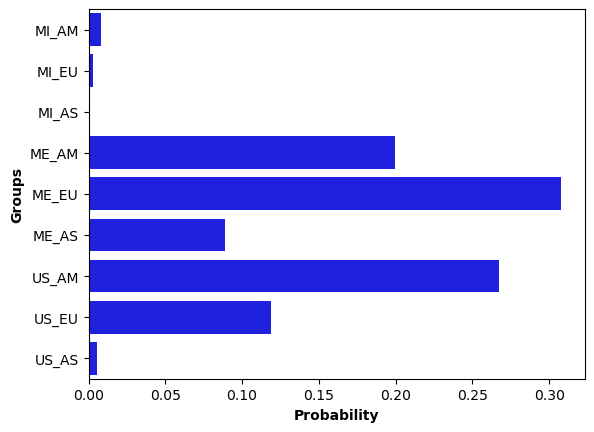

In [20]:
import seaborn as sns

sns.barplot(x= res,y= ['MI_AM','MI_EU','MI_AS','ME_AM','ME_EU','ME_AS','US_AM','US_EU','US_AS'],color="b")

plt.xlabel('Probability', fontsize=10, weight='bold')
plt.ylabel('Groups', fontsize=10, weight='bold')

6. Compare the empiric and the approximated distributions

In [21]:
k = 101342

sender = np.random.choice(9, k, p=res)

receiver = []

for i in sender:
    receiver.append(int(np.random.choice(9,1,p=rel_freq[i])))

In [22]:
dist = []
for i in range(k):
    element = int(np.random.choice(len(av_dist[sender[i]][receiver[i]]), 1))
    dist.append(av_dist[sender[i]][receiver[i]][element])

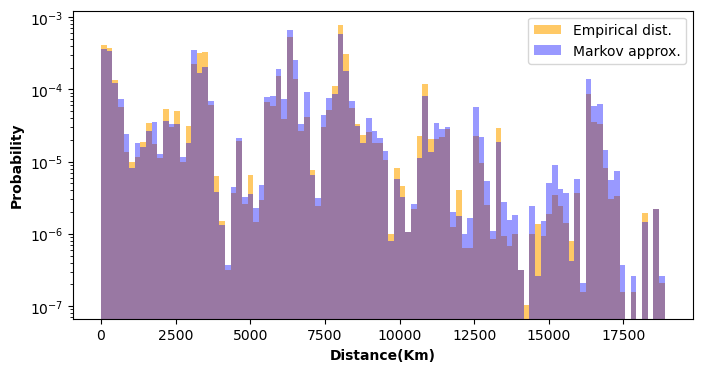

In [27]:
dis = sr['distance']

fig, axs = plt.subplots(1, 1, figsize=(8,4))

plt.hist(dis,bins=100, density=True, color='orange', alpha=0.6, label='Empirical dist.')
plt.hist(dist ,bins=100, density=True, color='blue', alpha=0.4, label='Markov approx.')


axs.set_yscale('log')
plt.xlabel('Distance(Km)', fontsize=10, weight='bold')
plt.ylabel('Probability', fontsize=10, weight='bold')
plt.legend()

plt.savefig('markov_original2_new.pdf', bbox_inches='tight')



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

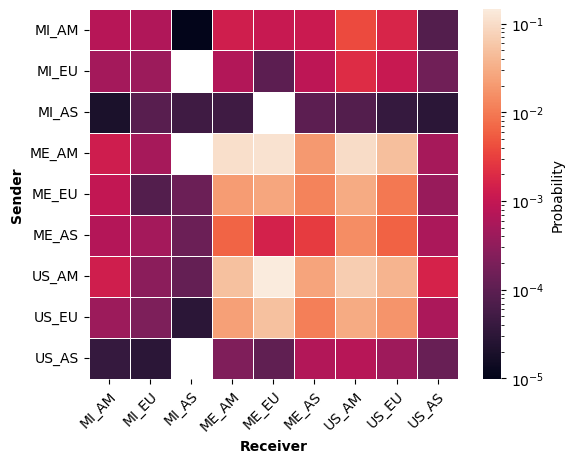

In [25]:
from matplotlib.colors import LogNorm, Normalize

ax = sns.heatmap(freq_plot, linewidth=0.5, cbar_kws={'label': 'Probability'},square=True, norm=LogNorm())

plt.xlabel('Receiver', fontsize=10, weight='bold')
plt.ylabel('Sender', fontsize=10, weight='bold')

ax.set_xticks(np.arange(0.5,9.5),labels=['MI_AM','MI_EU','MI_AS','ME_AM','ME_EU','ME_AS','US_AM','US_EU','US_AS'])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_yticks(np.arange(0.5,9.5),labels=['MI_AM','MI_EU','MI_AS','ME_AM','ME_EU','ME_AS','US_AM','US_EU','US_AS'])
plt.setp(ax.get_yticklabels(), rotation=360, ha="right",
         rotation_mode="anchor")

7. Calcute the Kolmogorov-Smirnov statistic

In [26]:
from scipy import stats

In [37]:
p_sum = 0
for e in range(50):

    it = 500

    sender = np.random.choice(9, it, p=res)

    receiver = []

    for i in sender:
        receiver.append(int(np.random.choice(9,1,p=rel_freq[i])))
    dist = []
    for i in range(it):
        element = int(np.random.choice(len(av_dist[sender[i]][receiver[i]]), 1))
        dist.append(av_dist[sender[i]][receiver[i]][element])    

    stat, p = stats.kstest(dist, dis)
    p_sum += p

p_sum = p_sum/50
            
print(p_sum)            

0.08430358687095593


8. Optimization

During the optimization process, we iterated over the number of transactions in which a merchant participated (TX_merch),
the number of transactions in which a miner participated (TX_miner) and the minimal value a miner sent or received (val). We made 500 transactions from each parametrization and calculated the K-S statistic's p-value. Our goal was to maximize this value.

During the optimization, the 3 parameters were changing between the following intervals:

    - TX_merch: 100-170, step=5
    - TX-miner: 30-90, step=5
    - val: 12-20, step=1
    
We received that the optimal values are: (120,50,15) and the p-value is 0.08